# 매트릭스 연산의 의미
## 이진 분류 예시
- 키와 몸무게를 보고, 운동종목(sports):축구/농구, 성별(sex):남/여, 나이(age):장년/청소년 등 세가지 목적변수를 구분하는 예
- 입력(X)는 키와 몸무게 이고, 세가지 목적 변수를 각각 y1, y2, y3라고 하겠다

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.figsize'] = (5,4)
from numpy import random

## 20명의 샘플 데이터 생성

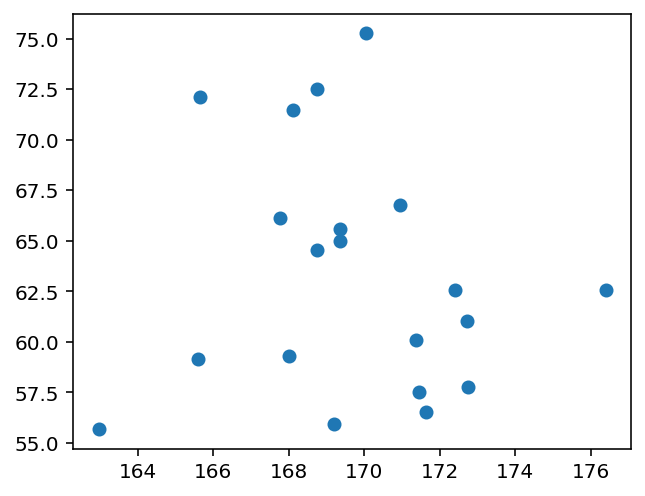

In [2]:
n_samples = 20
random.seed(15)
height = 4*np.random.randn(n_samples).round(2) + 170
weight = 5*np.random.randn(n_samples).round(2) + 65
df = pd.DataFrame({"height": height, "weight": weight})
plt.scatter(height, weight)

## 임의로 운동종목, 성별, 나이를 지정한다
- 축구, 농구 = 1,0
- 남, 여 = 1,0
- 장년, 청년 = 1,0

In [3]:
z = df.sort_values('height')
y1 = [1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0]
y2 = [0,0,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,0,1]
y3 = [0,0,1,1,0,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0]
z["sports"] = y1
z['sex'] = y2
z['age'] = y3
z

,height,weight,sports,sex,age
5,162.96,55.70,1,0,0
6,165.60,59.15,1,0,0
7,165.64,72.10,1,1,1
14,167.76,66.15,1,1,1
3,168.00,59.30,1,0,0
9,168.12,71.45,1,1,1
8,168.76,72.50,1,1,1
0,168.76,64.55,1,1,0
10,169.20,55.95,0,0,0
2,169.36,65.60,1,1,1


In [4]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = SGDClassifier()
# model = LogisticRegression()
X = z[["height", "weight"]]
X_sc = X.copy()
X_sc.loc[:,["height", "weight"]] = scaler.fit_transform(z[["height", "weight"]])

In [5]:
X_sc

,height,weight
5,-2.285332,-1.323672
6,-1.385111,-0.728666
7,-1.371472,1.504761
14,-0.648568,0.478591
3,-0.566730,-0.702796
9,-0.525810,1.392658
8,-0.307575,1.573747
0,-0.307575,0.202647
10,-0.157539,-1.280556
2,-0.102980,0.383735


## 이진 분류 경계 그리는 함수

In [6]:
def plot_dec_boundary(X,y,marker='o'):
    model.fit(X, y)
    w1, w2, b = model.coef_[0][0], model.coef_[0][1], model.intercept_[0]
#     xs = np.array((162, 177))
    xs = np.array((-3, 3))
    ys = -(w1/w2)*xs - b/w2
    plt.plot(xs,ys, c='r')
    plt.scatter(X.height,X.weight, c=y,s=20,marker=marker,cmap='bwr')  
    return (w1, w2, b)

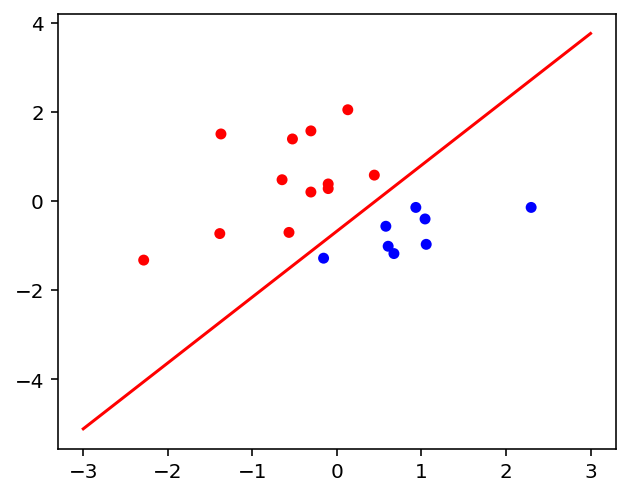

In [7]:
# W_1 = plot_dec_boundary(X,z.sports,marker='o')
W_1 = plot_dec_boundary(X_sc,z.sports,marker='o')

### $y_{1} = w_{11}x_{1}+w_{12}x_{2}+b_{1} > 0 : 축구 $
### W_1 = ($w_{11}, w_{12}, b_{1}$)

In [8]:
W_1

(-21.234663860605664, 14.372115766474625, 9.69562526288229)

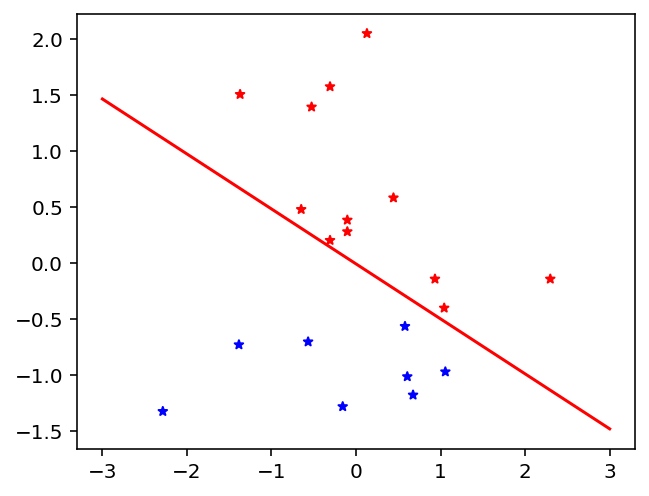

In [9]:
W_2 = plot_dec_boundary(X_sc,z.sex,marker='*')

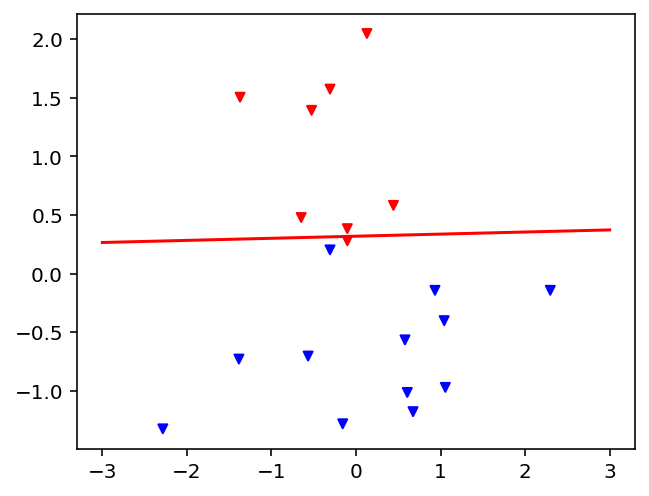

In [10]:
W_3 = plot_dec_boundary(X_sc,z.age,marker='v')

In [11]:
W = np.vstack((W_1, W_2, W_3))
W.round(2)

array([[-21.23,  14.37,   9.7 ],
       [ 14.67,  29.92,   0.23],
       [ -0.52,  29.28,  -9.34]])

$y_{1} = w_{11}x_{1}+w_{12}x_{2}+b_{1} > 0 : 축구 $  
$y_{2} = w_{21}x_{1}+w_{22}x_{2}+b_{2} > 0 : 남성 $   
$y_{3} = w_{31}x_{1}+w_{32}x_{2}+b_{3} > 0 : 장년 $   

$\begin{bmatrix} y_{1} & y_{2} & y_{3} \end{bmatrix} = \begin{bmatrix} x_{1} & x_{2} & 1 \end{bmatrix} 
\begin{bmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \\ b_{1} & b_{2} & b_{3} \end{bmatrix}$

## 임의의 샘플값 X로부터 3개의 목적변수를 예측

In [12]:
X_sample=np.array([[164,60],[170,70],[170,55],[173,63]]) # 4명의 임의의 샘플값
X_sample_sc= scaler.transform(X_sample)
# 바이어스 b를 반영할 '1' 컬럼 추가
X_sample_sc_1 = np.c_[X_sample_sc, np.ones(len(X_sample_sc))] 
print(X_sample_sc_1)
y_score = np.matmul(X_sample_sc_1,W.T)
y_score

[[-1.93069948 -0.58207069  1.        ]
 [ 0.11525546  1.1425832   1.        ]
 [ 0.11525546 -1.44439763  1.        ]
 [ 1.13823294 -0.06467452  1.        ]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


array([[ 42.32779251, -45.5145221 , -25.37494103],
       [ 23.66955234,  36.10947948,  24.04706455],
       [-13.51083575, -41.2902275 , -51.69313932],
       [-15.40387821,  15.00171469, -11.83409575]])

### y_score

$\begin{bmatrix} y_{11}&y_{12} &y_{13}  \\ y_{21}&y_{22} &y_{23} \\ y_{31}&y_{32} &y_{33} \\ y_{41}&y_{42} &y_{43} \end{bmatrix} = \begin{bmatrix} x_{11} & x_{12} & 1 \\ x_{21} & x_{22} & 1 \\ x_{31} & x_{32} & 1 \\ x_{41} & x_{42} & 1\end{bmatrix} 
\begin{bmatrix} w_{11} & w_{21} & w_{31} \\ w_{12} & w_{22} & w_{32} \\ b_{1} & b_{2} & b_{3} \end{bmatrix}$

# 이진 분류
### 점수를 직접 계산하여 > 0 인지 확인하는 방법

In [13]:
y_pred = (y_score > 0).astype('int')
y_pred

array([[1, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 0]])

In [14]:
df = pd.DataFrame(y_pred, columns=['sports','sex','age'])
df

,sports,sex,age
0,1,0,0
1,1,1,1
2,0,0,0
3,0,1,0


In [15]:
# X_s = pd.DataFrame(X_sample[:,(0,1)], columns=['키','몸무게'])
X_s = pd.DataFrame(X_sample_sc[:,(0,1)], columns=['키','몸무게'])
X_s

,키,몸무게
0,-1.930699,-0.582071
1,0.115255,1.142583
2,0.115255,-1.444398
3,1.138233,-0.064675


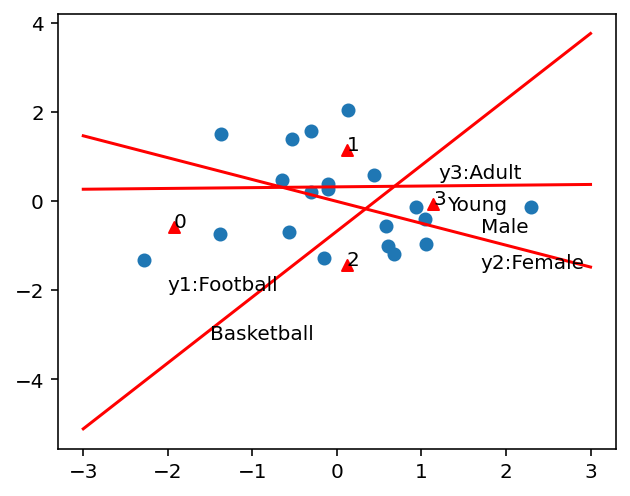

In [16]:
plt.scatter(X_sc.height,X_sc.weight)
# xs = np.array((162, 177))
xs = np.array((-3, 3))
for w in [W_1, W_2, W_3]:
    ys = -(w[0]/w[1])*xs - w[2]/w[1]
    plt.plot(xs,ys, c='r')
# plt.text(162,53,"y1:Football")
# plt.text(164,49,"Basketball")
# plt.text(174,60,"y2:Male")
# plt.text(174,58,"Female")
# plt.text(174,66,"y3:Adult")
# plt.text(174,63.7,"Young")
plt.text(-2,-2,"y1:Football")
plt.text(-1.5,-3.1,"Basketball")
plt.text(1.7,-1.5,"y2:Female")
plt.text(1.7,-0.7,"Male")
plt.text(1.2,0.5,"y3:Adult")
plt.text(1.3,-0.2,"Young")
plt.scatter(X_s['키'], X_s['몸무게'], c ='r', s=30, marker='^')
for i in range(len(X_s)):
    plt.text(X_s['키'][i], X_s['몸무게'][i], str(X_s.index[i]))

In [17]:
df.sports = df.sports.map({1:"축구", 0:"농구"})
df.sex = df.sex.map({1:"남", 0:"여"})
df.age = df.age.map({1:"장년", 0:"청년"})

In [18]:
X_sample

array([[164,  60],
       [170,  70],
       [170,  55],
       [173,  63]])

In [19]:
pd.concat((pd.DataFrame(X_sample), df), axis=1)

,0,1,sports,sex,age
0,164,60,축구,여,청년
1,170,70,축구,남,장년
2,170,55,농구,여,청년
3,173,63,농구,남,청년


In [20]:
y1

[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]

In [21]:
X_sc

,height,weight
5,-2.285332,-1.323672
6,-1.385111,-0.728666
7,-1.371472,1.504761
14,-0.648568,0.478591
3,-0.566730,-0.702796
9,-0.525810,1.392658
8,-0.307575,1.573747
0,-0.307575,0.202647
10,-0.157539,-1.280556
2,-0.102980,0.383735


## 선형 분류 모델 사용

In [22]:
# sports 예측 모델
model.fit(X_sc, y1)
model.predict(X_s)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 몸무게
- 키
Feature names seen at fit time, yet now missing:
- height
- weight

  warnings.warn(message, FutureWarning)


array([1, 1, 0, 0])

In [23]:
# sex 예측 모델
model.fit(X_sc, y2)
model.predict(X_s)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 몸무게
- 키
Feature names seen at fit time, yet now missing:
- height
- weight

  warnings.warn(message, FutureWarning)


array([0, 1, 0, 1])

In [24]:
# adult 예측 모델
model.fit(X_sc, y3)
model.predict(X_s)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 몸무게
- 키
Feature names seen at fit time, yet now missing:
- height
- weight

  warnings.warn(message, FutureWarning)


array([0, 1, 0, 0])

# 다중 레이블 분류
### 랜덤 포레스트를 사용

In [25]:
y = np.c_[(y1, y2, y3)]
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 0],
       [0, 1, 0]])

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
# 다중 목적변수 모델 (스케일링 수행)
rfc.fit(X_sc, y)
rfc.predict(X_s)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- 몸무게
- 키
Feature names seen at fit time, yet now missing:
- height
- weight

  warnings.warn(message, FutureWarning)


array([[1, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 0]])

In [27]:
# 다중 목적변수 모델 (스케일링 하지 않음)
rfc.fit(X, y)
rfc.predict(X_sample)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[1, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 0]])

# MLP 모델


In [46]:
from keras import layers
from keras import models
model_m = models.Sequential()
model_m.add(layers.Dense(3, activation='sigmoid', input_shape = (2,)))
model_m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [64]:
model_m.compile(loss='binary_crossentropy',
                optimizer='sgd', metrics=['accuracy'])
h = model_m.fit(X_sc, y, epochs=10, batch_size=10, verbose=1 )
y_res = model_m.predict(X_sample_sc)
(y_res > 0.5) * 1

Epoch 1/10
2/2 [==============================] - 1s 20ms/step - loss: 0.4758 - accuracy: 0.5000
Epoch 2/10
2/2 [==============================] - 0s 11ms/step - loss: 0.4752 - accuracy: 0.5000
Epoch 3/10
2/2 [==============================] - 0s 11ms/step - loss: 0.4746 - accuracy: 0.5000
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4739 - accuracy: 0.5000
Epoch 5/10
2/2 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.5000
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.4727 - accuracy: 0.5000
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 0.4721 - accuracy: 0.5000
Epoch 8/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4714 - accuracy: 0.5000
Epoch 9/10
2/2 [==============================] - 0s 4ms/step - loss: 0.4708 - accuracy: 0.5000
Epoch 10/10
2/2 [==============================] - 0s 6ms/step - loss: 0.4702 - accuracy: 0.5000


array([[1, 0, 0],
       [1, 1, 1],
       [1, 0, 0],
       [0, 1, 1]])